<Figure size 1000x600 with 0 Axes>

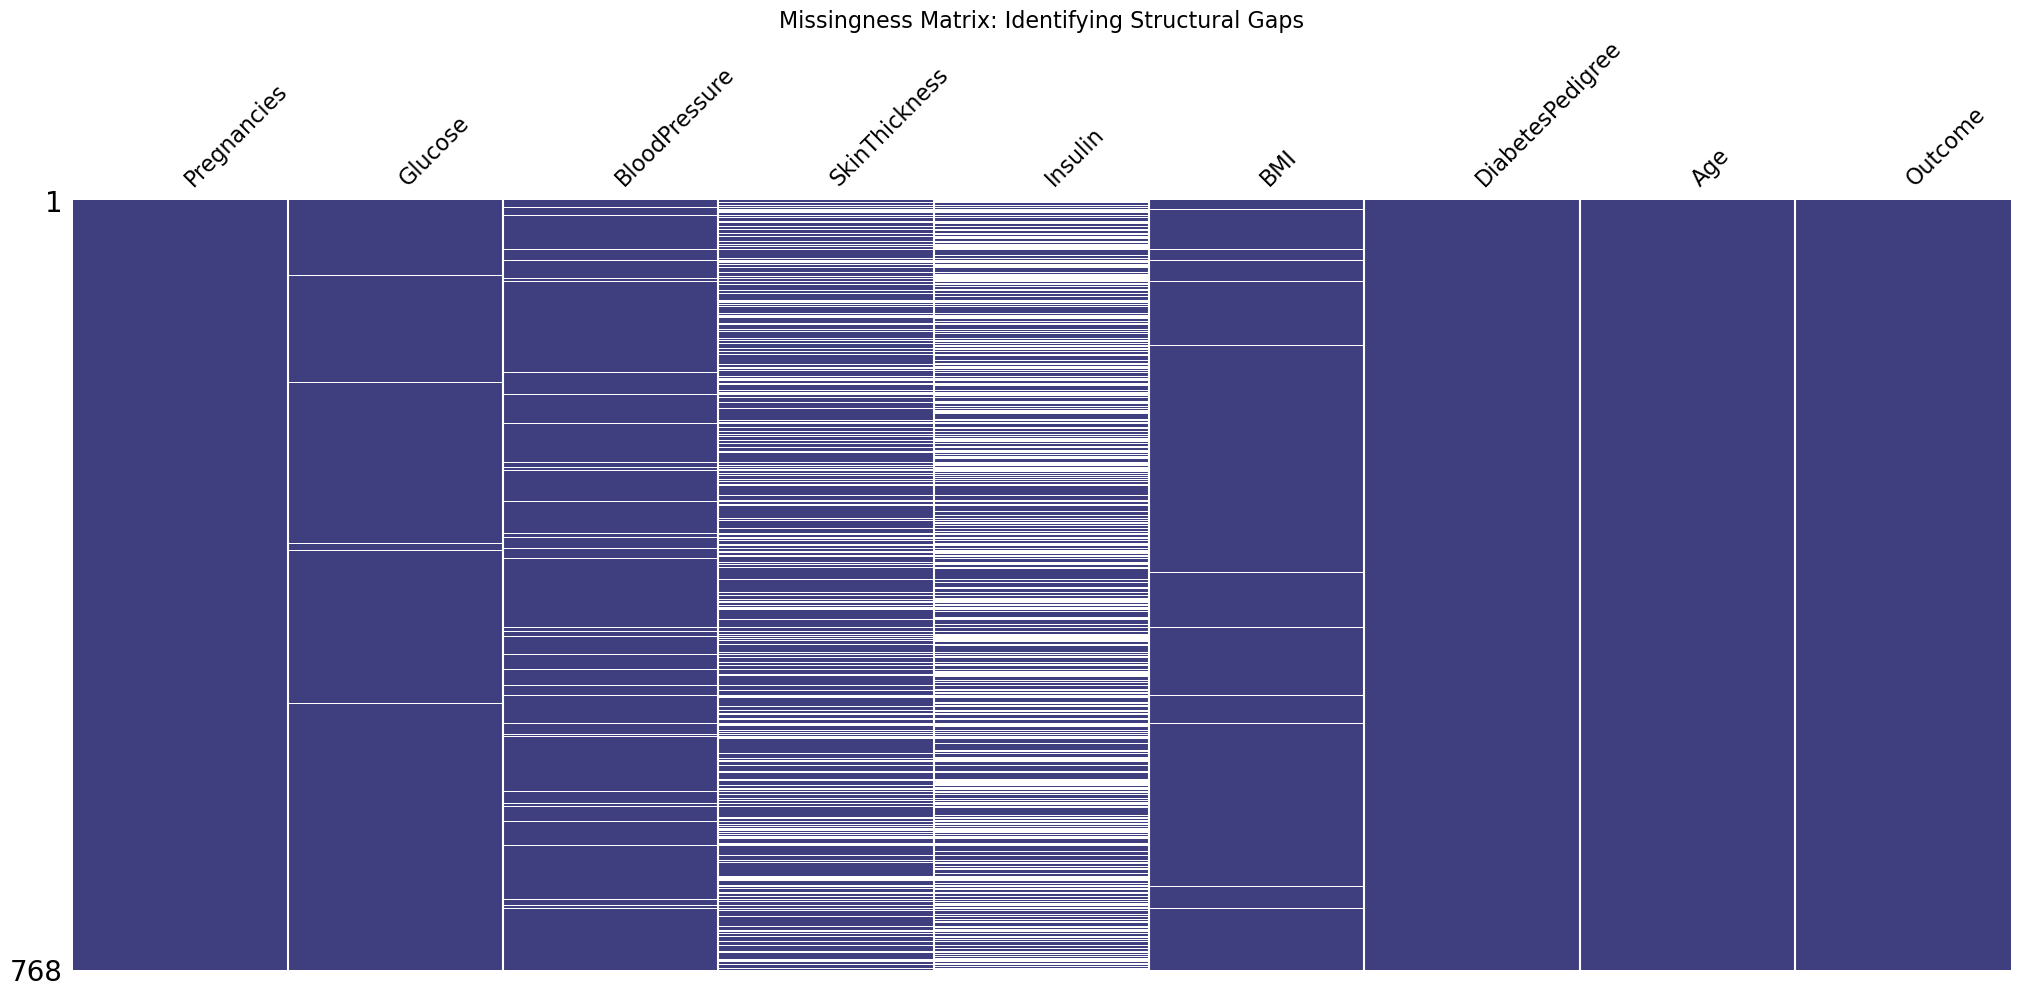

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the 'exposed' data from the previous step
df = pd.read_csv('../data/processed/pima_exposed.csv')

# Visual 1: Missingness Matrix
# Look for 'blocks' of white lines. If features disappear together, it's MAR.
plt.figure(figsize=(10, 6))
msno.matrix(df, sparkline=False, color=(0.25, 0.25, 0.5))
plt.title("Missingness Matrix: Identifying Structural Gaps", fontsize=16)
plt.show()

<Figure size 800x600 with 0 Axes>

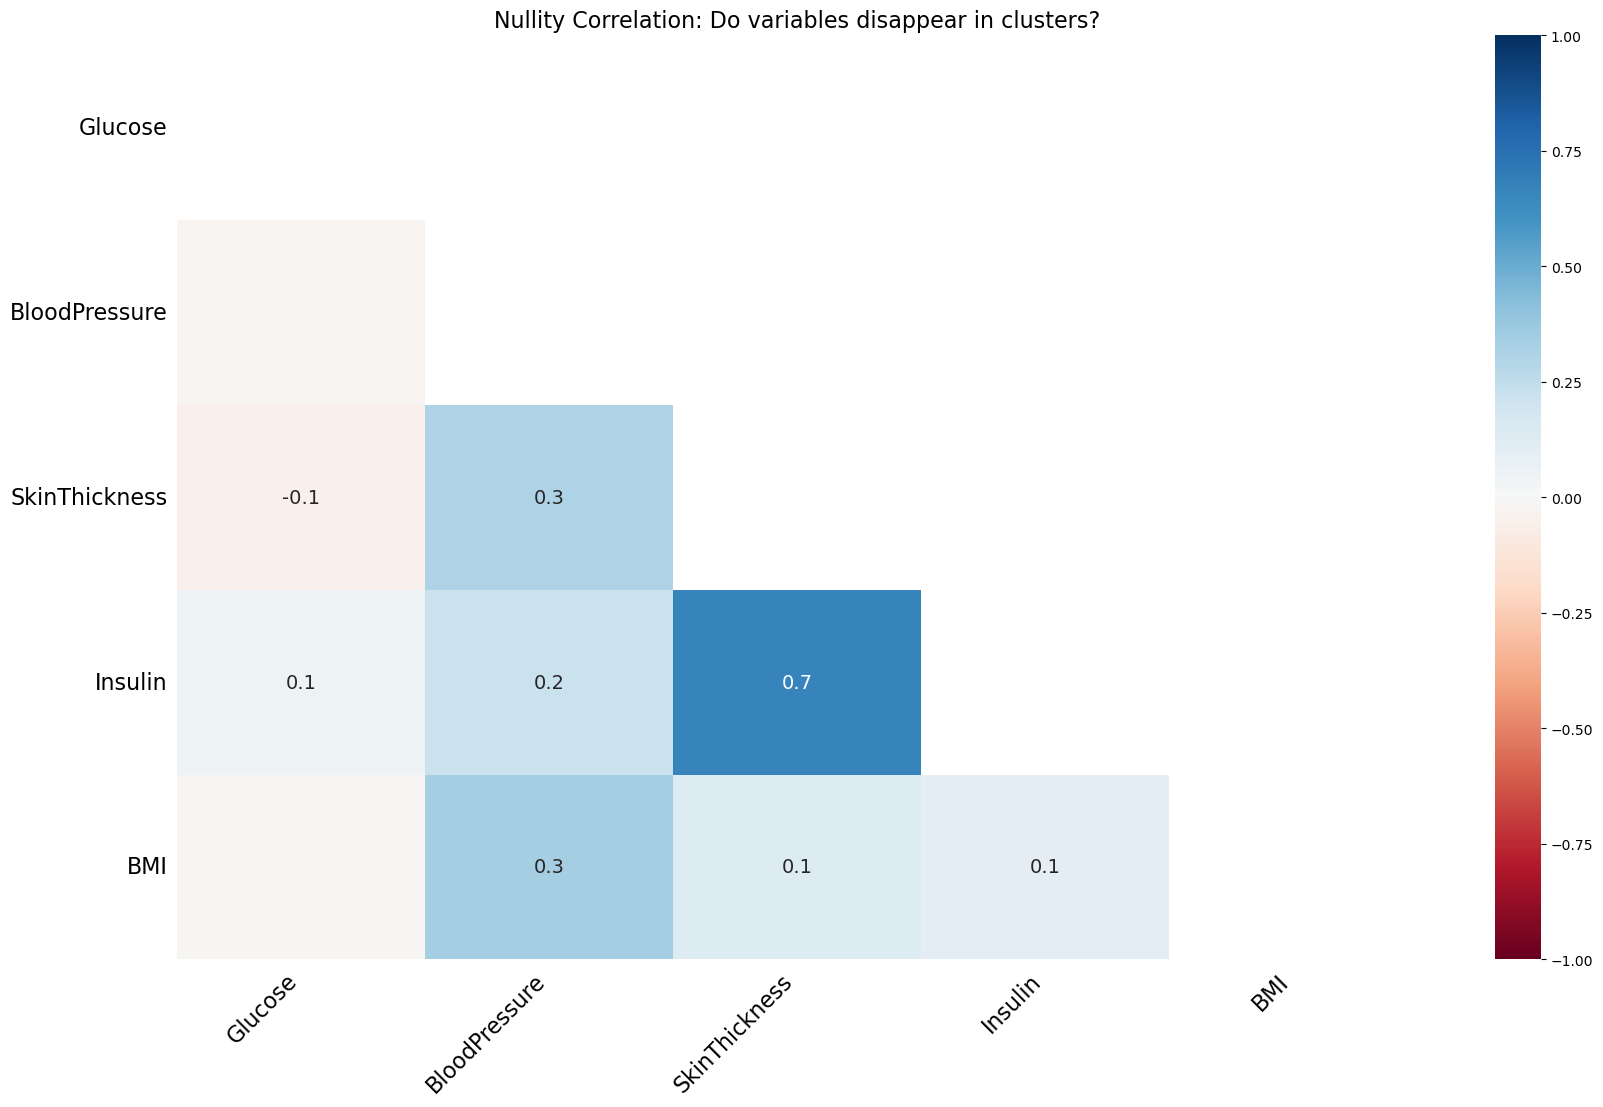

In [2]:
# Visual 2: Nullity Correlation Heatmap
# Measures how strongly the presence/absence of one variable predicts another.
plt.figure(figsize=(8, 6))
msno.heatmap(df)
plt.title("Nullity Correlation: Do variables disappear in clusters?", fontsize=16)
plt.show()

In [3]:
from scipy.stats import ttest_ind

def test_missing_impact(df, target_col, group_col):
    """
    Performs a T-test to see if the group with missing values 
    has a significantly different mean in another variable.
    """
    missing_group = df[df[group_col].isnull()][target_col].dropna()
    present_group = df[df[group_col].notnull()][target_col].dropna()
    
    t_stat, p_val = ttest_ind(missing_group, present_group)
    
    print(f"--- Audit: {group_col} missingness vs {target_col} ---")
    print(f"P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("RESULT: Missingness is NOT random (Significant difference found). Evidence of MAR.")
    else:
        print("RESULT: No significant difference. Suggests MCAR.")

# Audit: Does BMI affect whether Insulin is recorded?
test_missing_impact(df, 'BMI', 'Insulin')

--- Audit: Insulin missingness vs BMI ---
P-value: 0.0110
RESULT: Missingness is NOT random (Significant difference found). Evidence of MAR.


In [4]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x800 with 0 Axes>

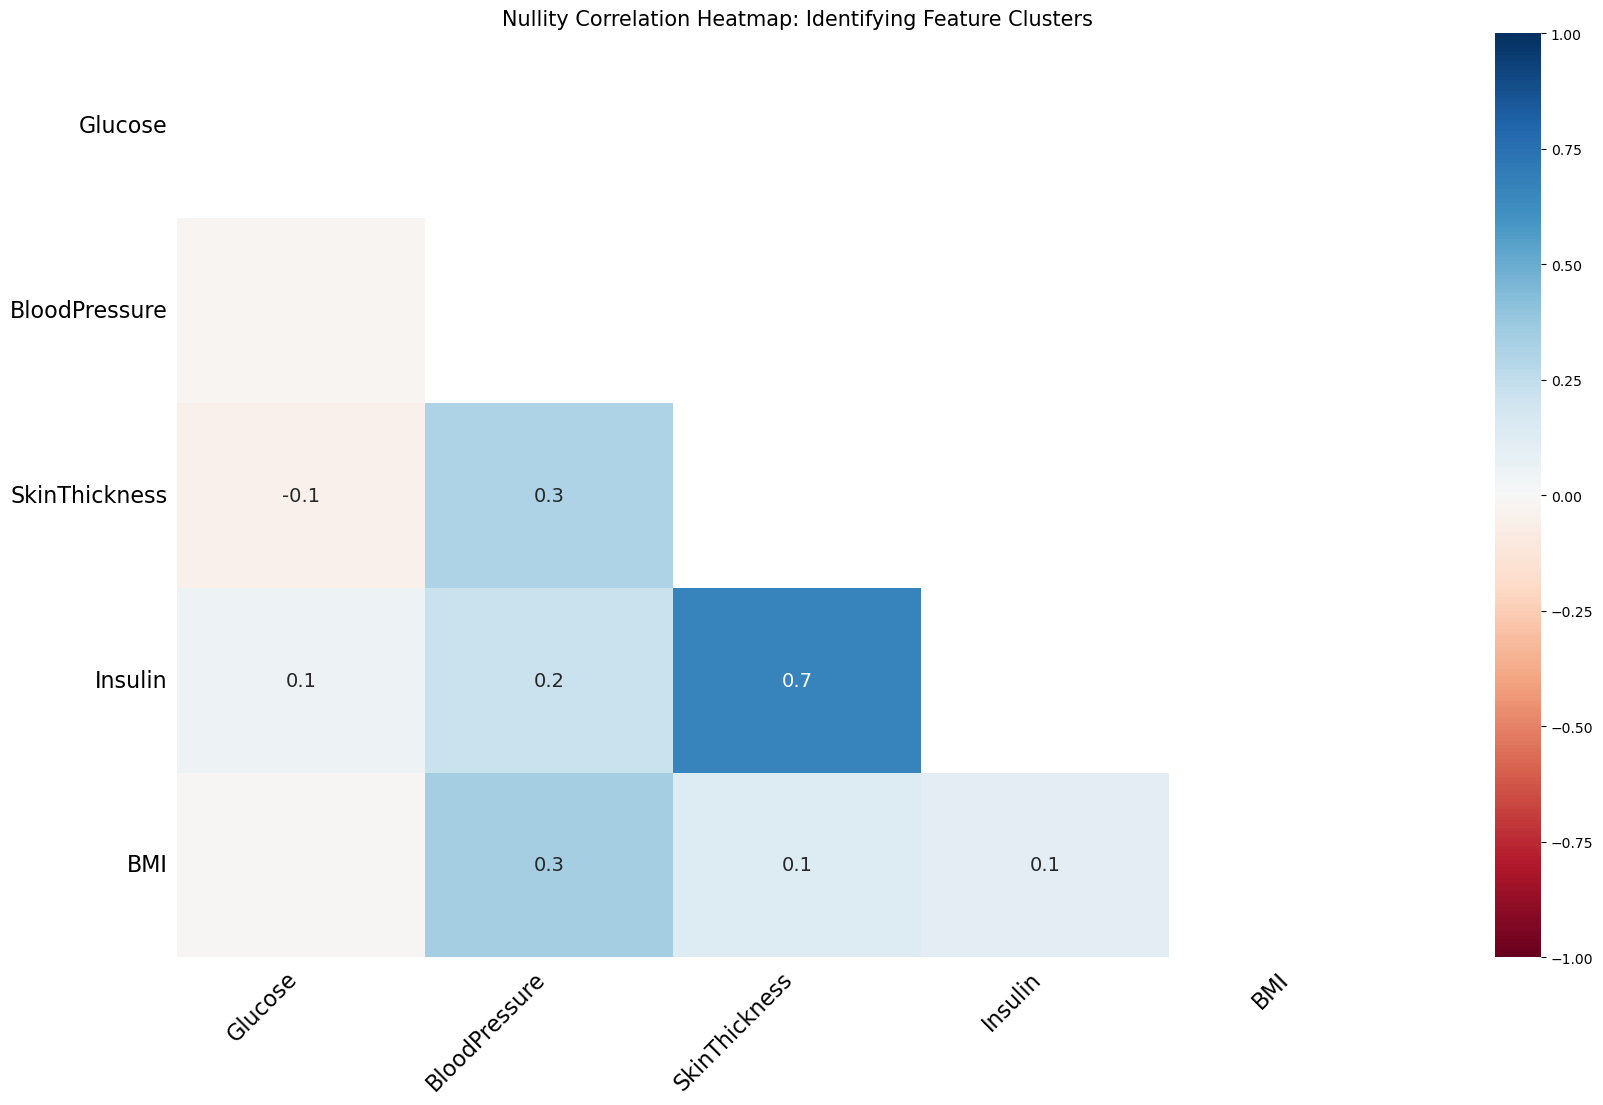

<Figure size 1000x600 with 0 Axes>

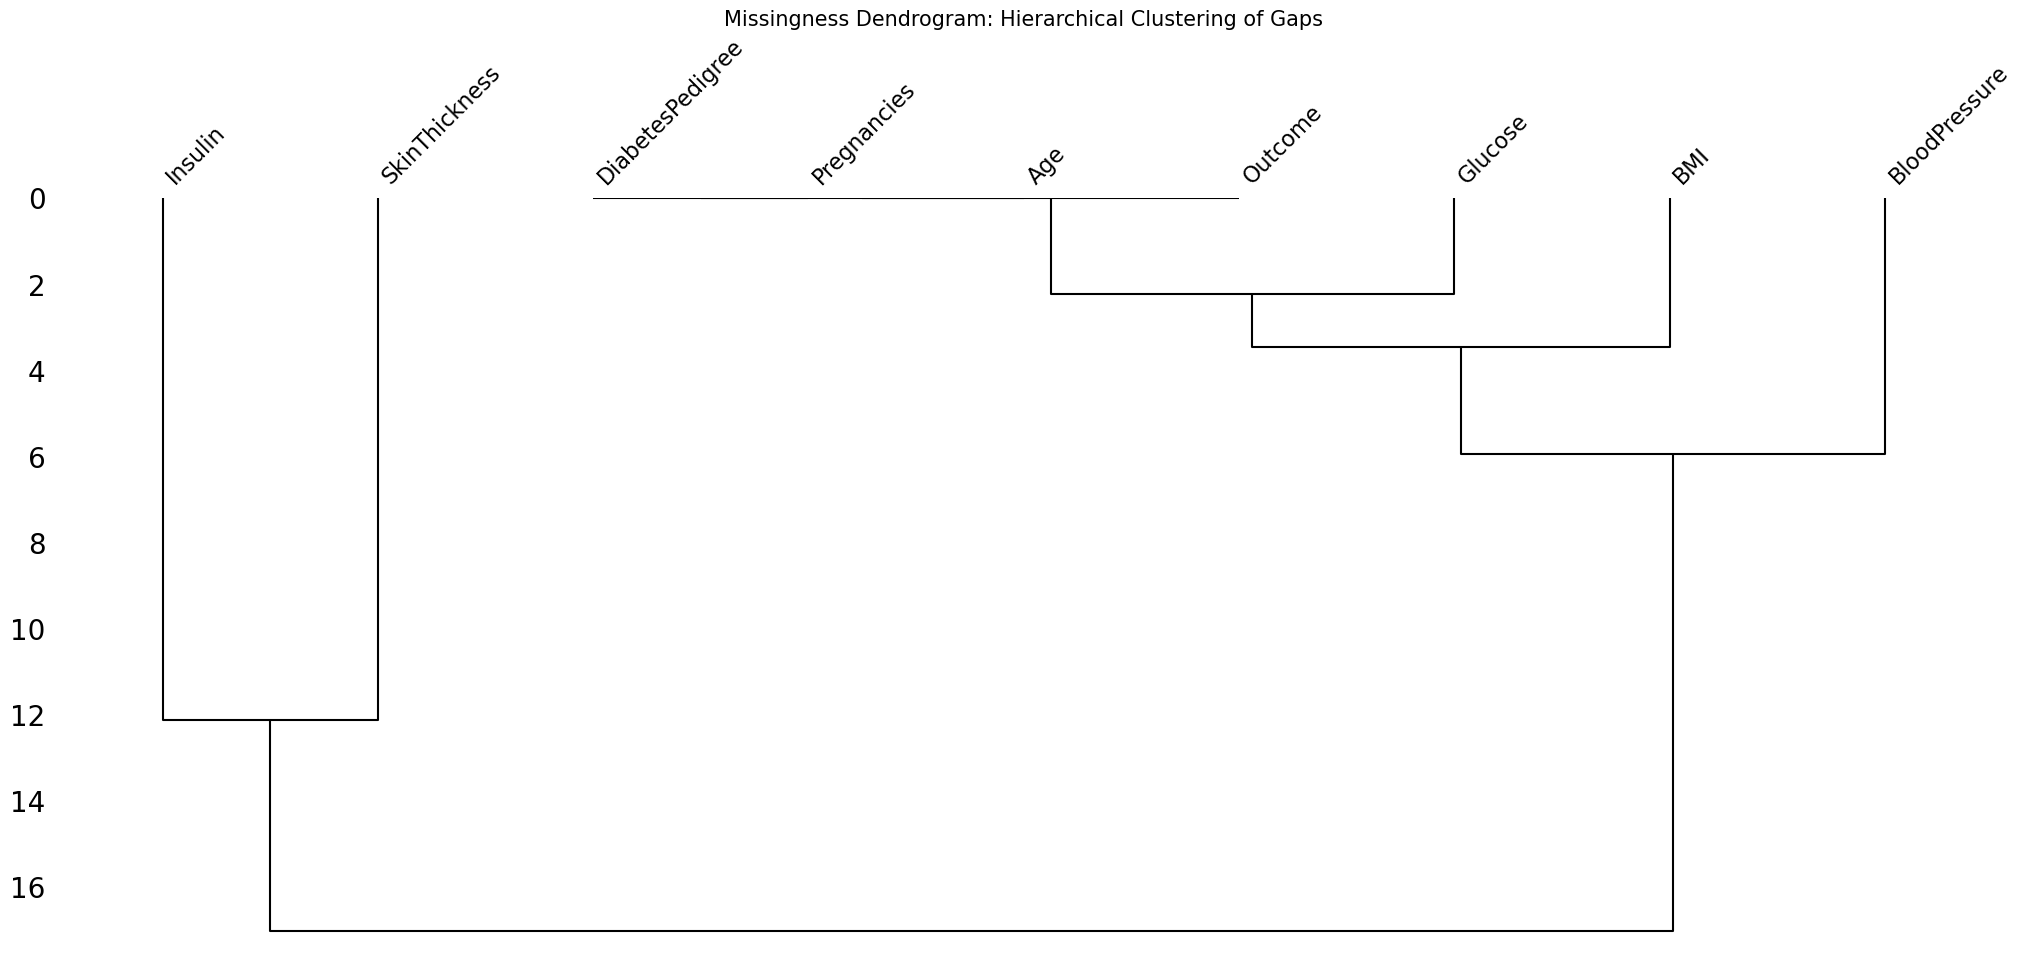

In [4]:
import missingno as msno
import matplotlib.pyplot as plt

# Visual 1: Nullity Correlation Heatmap
# Values close to 1.0 mean if one variable is missing, the other is almost certainly missing.
plt.figure(figsize=(10, 8))
msno.heatmap(df)
plt.title("Nullity Correlation Heatmap: Identifying Feature Clusters", fontsize=15)
plt.show()

# Visual 2: Missingness Dendrogram
# This uses hierarchical clustering to group variables that share missingness patterns.
plt.figure(figsize=(10, 6))
msno.dendrogram(df)
plt.title("Missingness Dendrogram: Hierarchical Clustering of Gaps", fontsize=15)
plt.show()

In [5]:
from scipy.stats import ttest_ind

def perform_mechanism_ttest(df, observed_var, missing_indicator_var):
    """
    Research-grade test for MAR.
    Compares observed_var means based on whether missing_indicator_var is null.
    """
    group_missing = df[df[missing_indicator_var].isnull()][observed_var].dropna()
    group_present = df[df[missing_indicator_var].notnull()][observed_var].dropna()
    
    t_stat, p_val = ttest_ind(group_missing, group_present)
    
    print(f"🔬 Audit: Does {observed_var} influence {missing_indicator_var} missingness?")
    print(f" - P-value: {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"✅ VERDICT: SIGNIFICANT (p < 0.05). Missingness is NOT random (MAR).")
        print(f"   The model must account for the relationship between {observed_var} and {missing_indicator_var}.")
    else:
        print(f"⚪ VERDICT: NOT SIGNIFICANT. Suggests MCAR (Missing Completely at Random).")

# Run the audit: Testing if Age affects Insulin recording
perform_mechanism_ttest(df, 'Age', 'Insulin')

🔬 Audit: Does Age influence Insulin missingness?
 - P-value: 0.000000
✅ VERDICT: SIGNIFICANT (p < 0.05). Missingness is NOT random (MAR).
   The model must account for the relationship between Age and Insulin.
